<div style="color:red;background-color:black">
Diamond Light Source
<br style="color:red;background-color:antiquewhite"><h1>Python Libraries: Curve Fitting</h1>  

©2000-20 Chris Seddon 
</div>

## 1
Before we start with fitting any real data, let's see how to use SciPy to perform curve fitting on some synthetic data.  We will begin by generating sample data for a simple polynominal and then add some noise to make hings more realistic.

Suppose we wish to fit the polynomial:
$$y = ax^2 + bx + c$$
where a, b and c are unknown constants.  

We can create some test data and plot it with the following code:

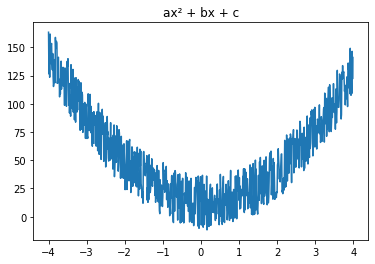

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

ax = plt.gca()
ax.set_title("ax" + chr(0x00B2) + " + bx + c")

x = np.arange(-4, 4, 0.01)
noise = np.random.rand((len(x)))-0.5 # between -0.5 and 0.5
y = 7.8*x**2 - 2.3*x + 13.4 + 50 * noise
plt.plot(x, y)
print()

## 2
Now we define the function to fit.  The function must have the input variable "x" as the first parameter, followed by all the unknown constants (a, b and c in our case).  The function must return "y".  SciPy will use the experimental data to estimate value for the unknown constants.  

SciPy curve fitting is designed for one dimensional fits.  It is possible to adapt the algorithm to multiple dimensions, but it is not straightford to do so.

Here is our fitting function:

In [2]:
def quadratic(x, a, b, c):
    return a*x**2 + b*x + c

## 3
We can perform the fit using SciPy's "curve_fit" method.  The method takes a pointer to our fit function, followed by the "x" and "y" experimental data.  The last parameter is a list of initial guesses for the 3 unknown constants.  If the initial guess is too far off, the fitting will fail.  Usually it's fairly easy to come up with some reasonable estimates.

In [3]:
import scipy.optimize

def initialGuess():    
    a = 5
    b = 0
    c = 8
    return [a, b, c]

fit, estimated_covariance = scipy.optimize.curve_fit(quadratic, x, y, p0=initialGuess())
print(f"estimates of [a, b, c] are {fit}")

estimates of [a, b, c] are [ 7.76961098 -2.37947013 13.33536738]


## 4
The curve fit returns estimates of the unknown constants and the estimated covariance.  The covariance information is discussed in SciPy documentation:
* <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit">scipy.optimize.curve_fit</a>

All that remains is to plot the fit against the synthetic experimental data:

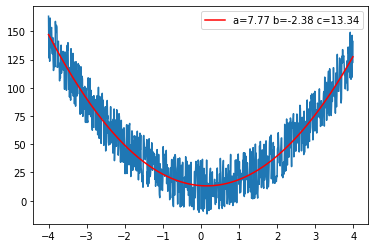

In [4]:
plt.plot(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.plot(x, quadratic(x, *fit), 'r-',
         label=f'a={fit[0]:.2f} b={fit[1]:.2f} c={fit[2]:.2f}')
plt.legend()
plt.show()

## 5
The three constants are reasonably accurate, especially in view of the large noise component.  Reduce the noise and we'd be even more accurate:

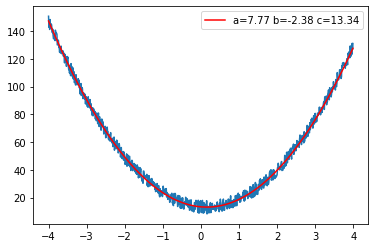

In [5]:
y = 7.8*x**2 - 2.3*x + 13.4 + 10 * noise
plt.plot(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.plot(x, quadratic(x, *fit), 'r-',
         label=f'a={fit[0]:.2f} b={fit[1]:.2f} c={fit[2]:.2f}')
plt.legend()
plt.show()

## 6
Now we know how to use SciPy's curve fitting module, we can perform curve fitting on some real experimental data from:
<pre>data/14763.dat</pre>
We'll use Pandas to read this data into memory.

In [6]:
%matplotlib inline
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import log, sqrt
from scipy.optimize import curve_fit

def main():
    fileName = "data/14763.dat"
    data = pd.read_csv(fileName, 
                       skiprows = 6,
                       engine = 'python',
                       sep = '[ \t]+')
    
    print(data)
    print(data.keys())
    
main()

       gonx   i_pin  Time
0   -1.7000  1.3456   0.0
1   -1.6980  1.3456   0.0
2   -1.6959  1.3461   0.0
3   -1.6941  1.3460   0.0
4   -1.6920  1.3457   0.0
..      ...     ...   ...
846 -0.0080  1.3520   0.0
847 -0.0060  1.3517   0.0
848 -0.0040  1.3517   0.0
849 -0.0020  1.3517   0.0
850 -0.0001  1.3519   0.0

[851 rows x 3 columns]
Index(['gonx', 'i_pin', 'Time'], dtype='object')


## 7
The plan is to plot 'gonx' against 'i_pin' to get an idea of what the data looks like.

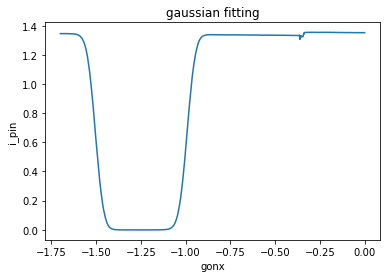

In [7]:
%matplotlib inline
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import log, sqrt
from scipy.optimize import curve_fit

def main():
    fileName = "data/14763.dat"
    data = pd.read_csv(fileName, 
                       skiprows = 6,
                       engine = 'python',
                       sep = '[ \t]+')
    
    plt.gcf().canvas.set_window_title(fileName)
    ax = plt.gca()
    ax.set_title("gaussian fitting")
    x = data['gonx']
    y = data['i_pin']
    ax.set_xlabel('gonx')
    ax.set_ylabel('i_pin')
    plt.plot(x, y)
    plt.show()
main()

## 8
This data is from a scan where the "i_pin" intensity drops off as we move "gonx".  Let's look at the differences plot.  

Don't forgot that by taking differences, we loose one value from the Y axis.  We should plot "gonx[:-1]" against "i_pin":

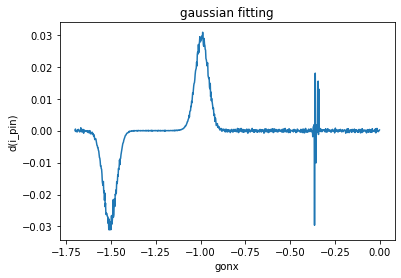

In [8]:
%matplotlib inline
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import log, sqrt
from scipy.optimize import curve_fit

def main():
    fileName = "data/14763.dat"
    data = pd.read_csv(fileName, 
                       skiprows = 6,
                       engine = 'python',
                       sep = '[ \t]+')
    
    plt.gcf().canvas.set_window_title(fileName)
    ax = plt.gca()
    ax.set_title("gaussian fitting")
    x = data['gonx']
    y = data['i_pin']
    dy = np.diff(y)
    ax.set_xlabel('gonx')
    ax.set_ylabel('d(i_pin)')
    plt.plot(x[:-1], dy)
    plt.show()
main()

## 9
We will be interested in the positive peak, so we need to slice off "gonx" values away from this peak.  We can incorporate removing 1 data point from the "x" axis by the following slices:
<pre>x = data['gonx'][250:-401]
y = data['i_pin'][250:-400]</pre>

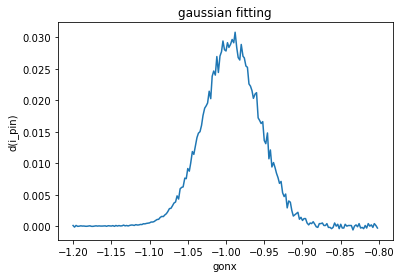

In [9]:
%matplotlib inline
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import log, sqrt
from scipy.optimize import curve_fit

fileName = "data/14763.dat"
data = pd.read_csv(fileName, 
                   skiprows = 6,
                   engine = 'python',
                   sep = '[ \t]+')

plt.gcf().canvas.set_window_title(fileName)
ax = plt.gca()
ax.set_title("gaussian fitting")
x = data['gonx']
y = data['i_pin']
dy = np.diff(y)
ax.set_xlabel('gonx')
ax.set_ylabel('d(i_pin)')
x = data['gonx'][250:-401]
y = data['i_pin'][250:-400]
dy = np.diff(y)
plt.plot(x, dy)
plt.show()

## 10
As before we need to define our function to be fitted.  This time it is a Gaussian.  The Gaussian is defined by 3 constants:

* peak: is at about 0.03
* μ: is the center which is about -1.0 
* σ: is the standard deviation and is about 0.4  

The standard deviation is related to to the full width at half maximum (FWHM) by the formula:
<pre>σ = FWHM / √(2log2)</pre>


In [10]:
import numpy as np

def gauss(x, peak, μ, σ):
    return peak*np.exp(-(x-μ)**2/(2.*σ**2))

## 11
The curve fitting procedes as before and the 3 constants are determined.  Our initial guess of the 3 constants could be the values determined above, but will work with a less accurate guess as below:

In [11]:
def initialGuess():    
    peak = 0.04
    center = -1.3
    FWHM = fullWidthAtHalfMaximum = 0.1
    k = 2 * sqrt(2 * log(2))
    standard_deviation = FWHM / k
    return [peak, center, standard_deviation]
fit, estimated_covariance = curve_fit(gauss, x, dy, p0=initialGuess())
print(f"[peak, μ, σ] = {fit}")

[peak, μ, σ] = [ 0.02906772 -0.99293825  0.03668829]


## 12
Finally, we can plot the fit against the experimental data.

Here is the complete example:

       gonx   i_pin  Time
0   -1.7000  1.3456   0.0
1   -1.6980  1.3456   0.0
2   -1.6959  1.3461   0.0
3   -1.6941  1.3460   0.0
4   -1.6920  1.3457   0.0
..      ...     ...   ...
846 -0.0080  1.3520   0.0
847 -0.0060  1.3517   0.0
848 -0.0040  1.3517   0.0
849 -0.0020  1.3517   0.0
850 -0.0001  1.3519   0.0

[851 rows x 3 columns]
Index(['gonx', 'i_pin', 'Time'], dtype='object')
[ 0.02906772 -0.99293825  0.03668829]


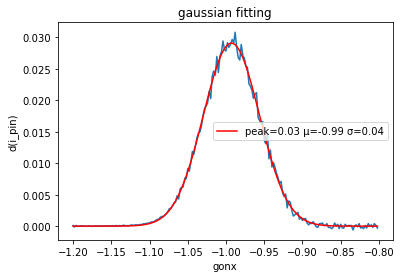

In [12]:
%matplotlib inline
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import log, sqrt
from scipy.optimize import curve_fit

def gauss(x, peak, μ, σ):
    return peak*np.exp(-(x-μ)**2/(2.*σ**2))

def main():
    fileName = "data/14763.dat"
    data = pd.read_csv(fileName, 
                       skiprows = 6,
                       engine = 'python',
                       sep = '[ \t]+')
    
    print(data)
    print(data.keys())
    
    plt.gcf().canvas.set_window_title(fileName)
    ax = plt.gca()
    ax.set_title("gaussian fitting")
    x = data['gonx'][250:-401]
    y = data['i_pin'][250:-400]
    dy = np.diff(y)
    
    def initialGuess():    
        peak = 0.04
        center = -1.3
        FWHM = fullWidthAtHalfMaximum = 0.1
        k = 2 * sqrt(2 * log(2))
        standard_deviation = FWHM / k
        return [peak, center, standard_deviation]
    fit, estimated_covariance = curve_fit(gauss, x, dy, p0=initialGuess())
    print(fit)
    plt.plot(x, dy)
    ax.set_xlabel('gonx')
    ax.set_ylabel('d(i_pin)')

    plt.plot(x, gauss(x, *fit), 'r-',
             label=f'peak={fit[0]:.2f} μ={fit[1]:.2f} σ={fit[2]:.2f}')
    plt.legend()
    plt.show()

main()

('amp=230.71, xo=84.33, yo=108.55', 'σₓ=35.63, σᵧ=3.79, ϑ=-0.04, offset=0.62')


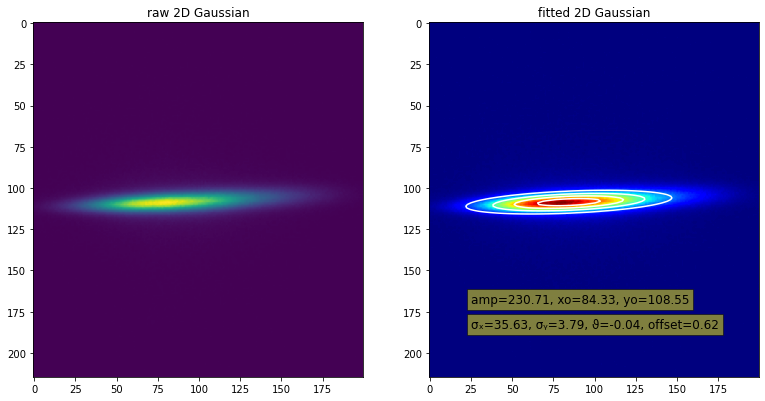

In [2]:
import scipy.optimize as opt
import numpy as np
from numpy import sin, cos, exp
import pylab as plt
import PIL
from scipy.optimize import curve_fit

def load_image(fileName):
    image = PIL.Image.open(fileName)
    image.load()
    return np.asarray(image, dtype="float")


def twoD_Gaussian(xdata_tuple, amplitude, xo, yo, σₓ, σᵧ, ϑ, offset):
    (x, y) = xdata_tuple
    a = cos(ϑ)**2/(2*σₓ*σₓ) + sin(ϑ)**2/(2*σᵧ*σᵧ)
    b = -sin(2*ϑ)/(4*σₓ*σₓ) + sin(2*ϑ)/(4*σᵧ*σᵧ)
    c = sin(ϑ)**2/(2*σₓ*σₓ) + cos(ϑ)**2/(2*σᵧ*σᵧ)
    g = offset + amplitude*exp(-(a*(x-xo)**2 + 2*b*(x-xo)*(y-yo) + c*(y-yo)**2))
    g = g.transpose()
    return g.ravel()

def getResult(p):
    return (f"amp={p[0]:.2f}, xo={p[2]:.2f}, yo={p[1]:.2f}",
            f"σₓ={p[4]:.2f}, σᵧ={p[3]:.2f}, ϑ={p[5]:.2f}, offset={p[6]:.2f}");

def initial_guess():
    amplitude = 3
    xo = 100
    yo = 100
    σₓ = 20
    σᵧ = 40
    ϑ = 0
    offset = 10
    return (amplitude, xo, yo, σₓ, σᵧ, ϑ, offset)

fileName = "data/gaussian.tif"
image = load_image(fileName)
data = image[()]

minX, minY = 300, 800
sizeX, sizeY = 215, 200
maxX, maxY = minX+sizeX, minY+sizeY
data_raw = data[minX:maxX, minY:maxY]
#sizeX, sizeY = data_raw.shape
# Create x and y indices
x = np.arange(0, sizeX)
y = np.arange(0, sizeY)
x, y = np.meshgrid(x, y)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 8))
plt.gcf().canvas.set_window_title('2D Gaussian Fitting')
ax1.set_title("raw 2D Gaussian")
ax2.set_title("fitted 2D Gaussian")

popt, pcov = opt.curve_fit(twoD_Gaussian, (x, y), np.ravel(data_raw), p0=initial_guess())

data_fitted = twoD_Gaussian((x, y), *popt)
print(getResult(popt))
ax2.imshow(data_raw.reshape(sizeX, sizeY), cmap=plt.cm.jet)
ax2.contour(y.transpose(), x.transpose(), data_fitted.reshape(sizeX, sizeY), 4, colors='w')



ax1.imshow(data_raw)
plt.text(25, 170, getResult(popt)[0], bbox=dict(facecolor='yellow', alpha=0.5), fontsize=12)
plt.text(25, 185, getResult(popt)[1], bbox=dict(facecolor='yellow', alpha=0.5), fontsize=12)
plt.show()
